<h3>KNN - Respondent 1 & 3</h3>

<h2>Pre-processing</h2>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Load the CSV file
file_path = '001-b45731a0_emotions_with_cognitive_tesk_and_screen.csv'
data = pd.read_csv(file_path)

# Load the second CSV file
new_file_path = '003-91dc3428_emotions_with_cognitive_tesk_and_screen.csv'
new_data = pd.read_csv(new_file_path)

# Merge the two dataframes
data = pd.concat([data, new_data])

# Drop the Timestamp column
data = data.drop('Timestamp', axis=1)

# Drop rows with NaN values in the target column
data = data.dropna(subset=['Cognitive Task'])
print(data.head())

# Select only relevant columns
selected_features = ['Anger', 'Contempt', 'Disgust', 'Fear', 'Joy', 'Sadness', 'Surprise', 'Confusion', 'Cognitive Task', 'Screens']
data = data[selected_features]

# Define the categories from the 'screens' column you want to include as features
selected_screens = ['Filter', 'Supporting material', 'Map', 'Statistics']

# Identify numeric and categorical features, excluding the target variable
all_columns = data.columns.tolist()
target_column = 'Cognitive Task'
all_columns.remove(target_column)
numeric_features = data[all_columns].select_dtypes(include=['int64', 'float64']).columns
categorical_features = ['Screens']

# Exclude the target column from the numeric features
numeric_features = numeric_features.drop('Cognitive Task', errors='ignore')

# Define the preprocessing steps for numeric and categorical features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(categories=[selected_screens], handle_unknown='ignore', sparse_output=False))])

# Combine the preprocessing steps into a single preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Preprocess the data
y = data['Cognitive Task']
X = data.drop('Cognitive Task', axis=1)
X_preprocessed = preprocessor.fit_transform(X)

# Combine the numeric and transformed categorical feature names
all_feature_names = list(numeric_features) + selected_screens

# Convert the preprocessed data back to a DataFrame
X_preprocessed = pd.DataFrame(X_preprocessed, columns=all_feature_names)

# Reset the index of y
y.reset_index(drop=True, inplace=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)


NameError: name 'X_train' is not defined

<h2>KNN Classifier</h2>

Confusion Matrix:
 [[8110  214    5   72  208  567   88]
 [ 295 2083   12    2  108  324    0]
 [  14   10  239    0   21   11    0]
 [  89    3    0 2461    5    4  382]
 [ 319  144   37    4 2361  167    0]
 [ 887  319   17    4  185 6714    0]
 [  87    1    0  333    8    4 3338]]

Classification Report:
                      precision    recall  f1-score   support

     Assess Results       0.83      0.88      0.85      9264
           Conclude       0.75      0.74      0.74      2824
   Data Exploration       0.77      0.81      0.79       295
              Focus       0.86      0.84      0.85      2944
Generate Hypothesis       0.82      0.78      0.80      3032
           Set Goal       0.86      0.83      0.84      8126
    Test Hypothesis       0.88      0.89      0.88      3771

           accuracy                           0.84     30256
          macro avg       0.82      0.82      0.82     30256
       weighted avg       0.84      0.84      0.84     30256


Accuracy Score

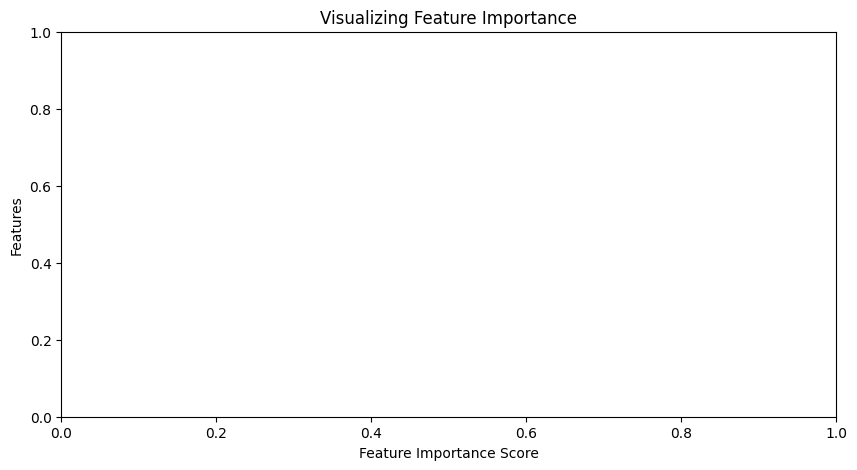

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Train the KNN model
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

# Test the model
y_pred = model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))



In [4]:
from sklearn.model_selection import cross_val_score

# Use 5-fold cross-validation to evaluate the model
cv_scores = cross_val_score(model, X_preprocessed, y, cv=5)
print("Average cross-validation score:", np.mean(cv_scores))


Average cross-validation score: 0.8197051824431517
